## IMPORT THE MODULES

In [100]:
#import the necessary modules
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import missingno as msno
from IPython.display import display
from sklearn.preprocessing import OrdinalEncoder
sns.set()
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATASET

In [101]:
#load the dataset
data = pd.read_csv('./DentalData13112.csv')
# data.head()

In [102]:
y = data['Final Diagnosis']
classes=y.unique()
print(len(classes))

33


In [103]:
#checkout what all the classes are and number  of cases
class_counts = y.value_counts()
for c in classes:
    print(f'Number of {c}: {class_counts[c]}')

Number of Acute Irreversible Pulpitis: 60
Number of Food impaction: 1
Number of Pulpitis with swelling : 1
Number of Acute Irreversible Pulpitis : 2
Number of Periodontal abcess: 1
Number of Acute Irreversible Pulpitis with acute gingivitis: 1
Number of Chronic destructive periodontitis: 1
Number of Acute Irreversible Pulpitis with extra oral swelling: 22
Number of Aphthous ulcer: 2
Number of Acute Reversible Pulpitis: 34
Number of Acute gingivitis: 2
Number of Acute Reversible Pulpitis with swelling : 1
Number of Aphthous ulcer : 6
Number of Dental caries with food impaction: 1
Number of Extra oral swelling with Acute Irreversible Pulpitis: 4
Number of Acute Reversible Pulpitiswith food impaction: 1
Number of Periodontitis with grade 2 tooth mobility : 1
Number of Periodontitis with mobility of tooth: 1
Number of Chronic gingivitis : 1
Number of Dental abcess: 1
Number of Pericoronitis: 1
Number of Chronic gingivitis with teeth mobility : 1
Number of Gingivitis: 4
Number of Dental abc

<AxesSubplot:xlabel='count', ylabel='Final Diagnosis'>

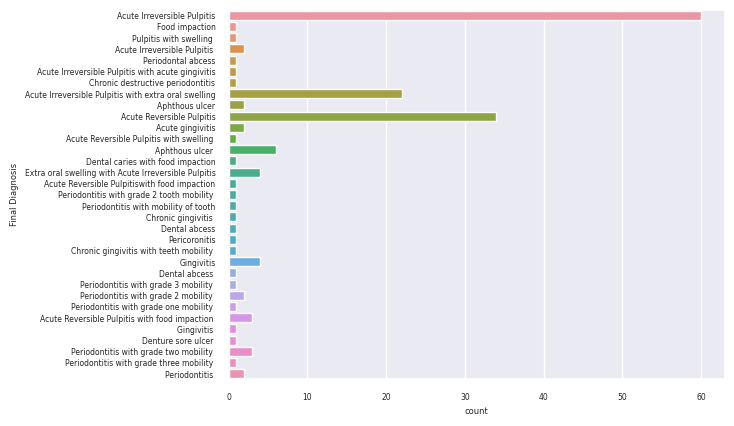

In [104]:
#plot and see the data
# data['Final Diagnosis']=data['Final Diagnosis'].str.replace('Pulipitiis','Pulpitis')
sns.set(font_scale=0.5)
sns.countplot(y=y, label="Number of cases")

## DATA PREPROCESSING

In [105]:
data['Chief complaint']=data['Chief complaint'].str.replace('Ulecer','Ulcer')
correct_pulp={
    'Pulpits':'Pulpitis',
    'pulpits':'Pulpitis',
    'pulpitts':'Pulpitis',
    'pulpitis':'Pulpitis',
    'Periodontitis with grade two mobility':'Periodontitis',
    'Periodontitis with grade three mobility':'Periodontitis',
    'Periodontitis with grade one mobility':'Periodontitis',
    'Periodontitis with grade 1 mobility':'Periodontitis',
    'Periodontitis with grade 2 mobility':'Periodontitis',
    'Periodontitis with grade 3 mobility':'Periodontitis',
    'Periodontitis with mobility of tooth':'Periodontitis',
    'Periodontitis with grade 2 tooth mobility':'Periodontitis',
    'Gingivitis':'Acute gingivitis',
    'gingivitis':'Gingivitis'

}
for word, correct in correct_pulp.items():
    data['Final Diagnosis']=data['Final Diagnosis'].str.replace(word,correct)


26


<AxesSubplot:xlabel='count', ylabel='Final Diagnosis'>

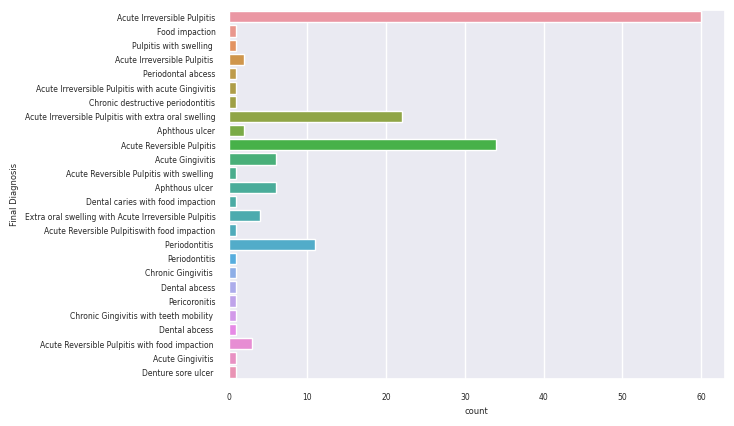

In [106]:
y_new = data['Final Diagnosis']
classes_new = y_new.unique()
print(len(classes_new))

sns.set(font_scale=0.5)
sns.countplot(y=y_new,label='Number of cases')

In [107]:
# look out for null values
data.isnull().sum()

Timestamp                                                                              0
Patient Number                                                                         0
Chief complaint                                                                        1
Nature of Pain                                                                         3
Severity of pain                                                                       5
Onset  and mode of pain                                                                9
Factors which worsens the pain                                                        10
Is the swelling painful?                                                              92
Has the swelling changed since it was first noticed? If yes how quickly?              91
Does the swelling changes during normal activities such as eating, speaking, etc?     91
Is the ulcer painful                                                                 111
Is there bleeding fro

In [108]:
# filling in missing values and checking again
data['Chief complaint'].fillna("Pain",inplace=True)
data.fillna("No",inplace=True)
print(data.isnull().sum())
data.sample(10)


Timestamp                                                                            0
Patient Number                                                                       0
Chief complaint                                                                      0
Nature of Pain                                                                       0
Severity of pain                                                                     0
Onset  and mode of pain                                                              0
Factors which worsens the pain                                                       0
Is the swelling painful?                                                             0
Has the swelling changed since it was first noticed? If yes how quickly?             0
Does the swelling changes during normal activities such as eating, speaking, etc?    0
Is the ulcer painful                                                                 0
Is there bleeding from the ulcer           

,Timestamp,Patient Number,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",...,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
165,11/11/2023 10:31:12,M10,Swelling,aching,Mild,lingering pain,Eating,No,Slow,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis with extra oral sw...,No,No,No
127,10/11/2023 08:48:20,F43,Swelling,aching,Moderate,lingering pain,Eating,Yes,Slow,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis with extra oral sw...,No,No,No
9,01/11/2023 17:16:37,F5,Pain,aching,Severe,The pain came suddenly,Eating,No,Slow,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis with acute Gingivitis,No,Yes,No
81,06/11/2023 11:19:13,F47,Pain,throbbing,Mild,lingering pain,Hot foods or drinks,No,No,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No
74,06/11/2023 11:14:14,F25,Pain,stabbing,Severe,lingering pain,Eating,No,No,No,...,No,No,No,No,No,No,Pericoronitis,No,No,No
43,03/11/2023 11:22:16,F35,Swelling,No,No,No,No,No,No,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis with extra oral sw...,No,No,No
94,07/11/2023 09:22:27,M63,Pain,aching,Mild,lingering pain,No,No,No,No,...,No,No,No,No,No,No,Periodontitis,No,Yes,3
58,06/11/2023 10:13:39,F48,Pain,throbbing,No,No,No,No,No,No,...,No,No,No,No,No,No,Periodontitis,Yes,Yes,2
117,10/11/2023 08:35:13,F25,Pain,throbbing,Mild,The pain came suddenly,Cold foods or drinks,No,No,No,...,No,No,No,No,No,No,Acute Reversible Pulpitis,No,No,No
39,03/11/2023 11:10:34,F32,Pain,aching,Mild,lingering pain,Laying down,No,No,No,...,No,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No


In [109]:
#Dropping unnecessary fields
data.drop('Timestamp',axis=1, inplace=True)
data.drop('Patient Number',axis=1, inplace=True)

In [110]:
# #using ordinal encoder to change the fields to numerical values
encode=OrdinalEncoder(dtype=float)
patient_encode=pd.DataFrame(encode.fit_transform(data),columns=data.columns) 
for i, cats in enumerate(encode.categories_):
    print("Column:", data.columns[i])
    for j, cat in enumerate(cats):
        print(cat, ":", j)

patient_encode.head(5)

Column: Chief complaint
No : 0
Pain : 1
Swelling : 2
Ulcer : 3
Column: Nature of Pain
No : 0
aching : 1
burning : 2
stabbing : 3
throbbing : 4
Column: Severity of pain
Mild : 0
Moderate : 1
No : 2
Severe : 3
Column: Onset  and mode of pain
No : 0
The pain came suddenly : 1
lingering pain : 2
Column: Factors which worsens the pain
Cold foods or drinks : 0
Eating : 1
Hot foods or drinks : 2
Laying down : 3
No : 4
Column: Is the swelling painful?
No : 0
Yes : 1
Column: Has the swelling changed since it was first noticed? If yes how quickly?
No : 0
Rapid : 1
Slow : 2
Column: Does the swelling changes during normal activities such as eating, speaking, etc?
No : 0
Column: Is the ulcer painful
No : 0
Yes : 1
Column: Is there bleeding from the ulcer
No : 0
Column: Is there discharge from the ulcer?
No : 0
Column: Is there a foul smell from the ulcer?
No : 0
Column: Do the ulcers interfere with daily activities
No : 0
Yes : 1
Column: Has the ulcer changed since first noticed?
No : 0
Yes : 1
Col

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
0,1.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,3.0
2,2.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,3.0
3,1.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
4,2.0,0.0,2.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,3.0


In [111]:
patient_encode.to_csv('./DentalData1111_encoded.csv',index=False)

In [112]:
train,test=train_test_split(patient_encode,test_size=0.2, random_state=42)
print(len(train))
print(len(test))

132
34


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train = train.drop(columns=['Final Diagnosis'])
y_train = train['Final Diagnosis']


X_test = test.drop(columns=['Final Diagnosis'])  
y_test = test['Final Diagnosis']

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.estimators_ = [DecisionTreeClassifier() for _ in range(100)] 

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = rf.score(X_test, y_test) 

print("Random Forest Accuracy:",rf_accuracy)

Random Forest Accuracy: 0.8235294117647058


In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score

# Train model
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)

# Calculate F1 score 
f1 = f1_score(y_test, rf_pred, average='weighted')
print("F1 score:", f1)

# Can also calculate other scores
precision = precision_score(y_test, rf_pred, average='weighted')  
recall = recall_score(y_test, rf_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

F1 score: 0.7735294117647059
Precision: 0.7450980392156863
Recall: 0.8235294117647058


In [115]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Extract X and y
X_train = train.drop('Final Diagnosis', axis=1) 
y_train = train['Final Diagnosis']

X_test = test.drop('Final Diagnosis', axis=1)
y_test = test['Final Diagnosis']

# Create LogisticRegression instance 
logreg = LogisticRegression()

# Fit on training data
logreg.fit(X_train, y_train)  

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("Logistic Regression Accuracy:", 
      accuracy_score(y_test, y_pred))
print("Logistic Regression Accuracy:", 
      f1_score(y_test, y_pred,average='weighted'))

Logistic Regression Accuracy: 0.7647058823529411
Logistic Regression Accuracy: 0.7409502262443439


In [116]:
# Save trained model
import pickle 
pickle.dump(rf, open('rf_model.pkl2', 'wb'))

# Save fitted ordinal encoder
pickle.dump(patient_encode, open('encoder.pkl2', 'wb'))

In [117]:
encoder = pickle.load(open('encoder.pkl2','rb'))
print(encoder.columns)

Index(['Chief complaint', 'Nature of Pain', 'Severity of pain',
       'Onset  and mode of pain', 'Factors which worsens the pain',
       'Is the swelling painful?',
       'Has the swelling changed since it was first noticed? If yes how quickly?',
       'Does the swelling changes during normal activities such as eating, speaking, etc?',
       'Is the ulcer painful', 'Is there bleeding from the ulcer',
       'Is there discharge from the ulcer?',
       'Is there a foul smell from the ulcer?',
       'Do the ulcers interfere with daily activities',
       'Has the ulcer changed since first noticed?',
       'Have you had similar ulcers?', 'Final Diagnosis',
       'Is there bleeding in the gums?', 'Is there pain in the gums',
       'If any tooth/teeth is/are mobile, what is the degree of mobility'],
      dtype='object')
